<a href="https://colab.research.google.com/github/reeda23/OpenCV104-Histograms/blob/main/3_histogram_matching.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [2]:
#import packages 
from skimage import exposure
import numpy as np
import cv2
import matplotlib.pyplot as plt

In [3]:
#func to show images 
def plt_showimage(title, image):
    image = cv2.cvtColor(image, cv2.COLOR_BGR2RGB)
    plt.imshow(image)
    plt.title(title)
    plt.grid(False)
    plt.show()

In [4]:
#reading source and target images
source = cv2.imread('/content/drive/MyDrive/OpenCV104 - Histograms/empire_state_cloudy.png')
reference = cv2.imread('/content/drive/MyDrive/OpenCV104 - Histograms/empire_state_sunset.png')

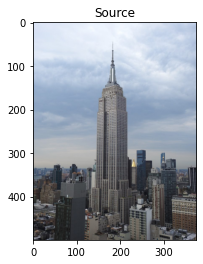

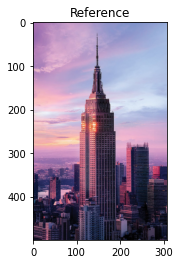

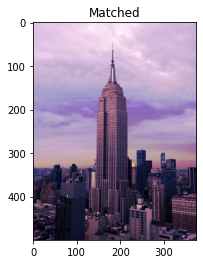

In [5]:
#applying histogram matching
multi = True if source.shape[-1] > 1 else False
matched = exposure.match_histograms(source, reference, multichannel=multi)

plt_showimage("Source", source)
plt_showimage("Reference", reference)
plt_showimage("Matched", matched)

Text(0.5, 1.0, 'Matched')

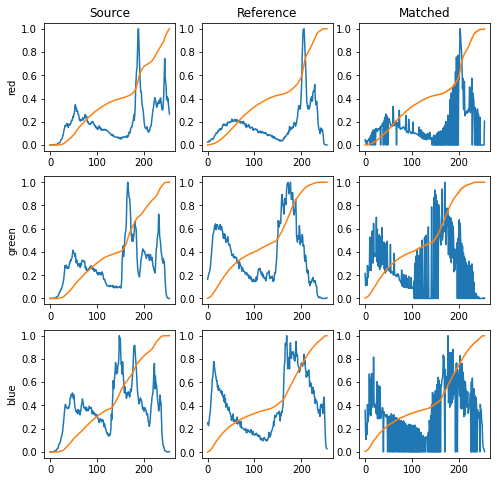

In [6]:
#figure to display histogram for each channel

(fig, axs) = plt.subplots(nrows=3, ncols=3, figsize= (8,8))

for (i, image) in enumerate((source, reference, matched)):

    # loop over the names of the channels in RGB order
	for (j, color) in enumerate(("red", "green", "blue")):
		# compute a histogram for the current channel and plot it
		(hist, bins) = exposure.histogram(image[..., j],
			source_range="dtype")
		axs[j, i].plot(bins, hist / hist.max())

		# compute the cumulative distribution function for the
		# current channel and plot it
		(cdf, bins) = exposure.cumulative_distribution(image[..., j])
		axs[j, i].plot(bins, cdf)

		# set the y-axis label of the current plot to be the name
		# of the current color channel
		axs[j, 0].set_ylabel(color)
  
# set the axes titles
axs[0, 0].set_title("Source")
axs[0, 1].set_title("Reference")
axs[0, 2].set_title("Matched")